# Lab 3

Fish.csv is a data set collected on 7 common fish species from fish market sales. The columns include Species, Weight (grams), Length1 (vertical length in cm), Length2 (diagonal lenght in cm), Length3(cross length in cm), Height (cm), and Width (cm). Linear Regression may be used to predict Weight using the other features.

** <font color='red'>For the coding exercises, you may use open source libraries.</font> **

** Please run the code blocks below and proceed to Exercise 1. **

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('Fish.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [90]:
def oneHot(category, hot):
    if category == hot:
        return 1
    else:
        return 0

In [91]:
dict={}
for fish in df['Species'].tolist():
    dict[fish]=1
    
for fish in dict.keys():
    df[fish] = df['Species'].apply(oneHot, hot=fish)

df = df.drop(['Species'],axis=1)

In [92]:
df.corr()["Weight"].sort_values(ascending=False)

Weight       1.000000
Length3      0.923044
Length2      0.918618
Length1      0.915712
Width        0.886507
Height       0.724345
Bream        0.326795
Pike         0.310641
Whitefish    0.073625
Perch       -0.033240
Parkki      -0.186034
Roach       -0.261784
Smelt       -0.337109
Name: Weight, dtype: float64

In [93]:
X = df.drop(['Weight'],axis=1)
y = df[['Weight']]

In [94]:
# Scale the features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

df_scaled = pipeline.fit_transform(X)
X = pd.DataFrame(df_scaled)

In [95]:
X = np.c_[np.ones((159, 1)), X]  # add x0 = 1

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

# Exercise 1

a. Implement Linear Regression using Stochastic Gradient Descent with early stopping regularization.

b. Plot the training and validation cost vs. epoch. At what epoch (approximately) does the model start to overfit?

c. Which epoch did the model converge to the "best model"?

## Linear Regression using Stochastic Gradient Descent with early stopping

In [97]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [98]:
#perform the linear regression
sgd_reg = SGDRegressor(max_iter=1000, early_stopping=True)
sgd_reg.fit(X_train, y_train.ravel)

AttributeError: 'DataFrame' object has no attribute 'ravel'

In [113]:
print(X_train.shape[0])

127


In [144]:
#write to code for SGD so that we can pull middle lines
#file:///C:/Users/matth/Desktop/misc/CS3315/Hands-On%20Machine%20Learning%20with%20Scikit-Learn,%20Keras,%20and%20TensorFlow,%202nd%20Edition%20(Aurelien%20Geron%20[G%C3%A9ron,%20Aur%C3%A9lien])%20(z-lib.org).pdf
#Page 125
n_epochs = 50
t0, t1 = 5, 100
m = X_train.shape[0] #number of samples per mini-batch
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(13,1)

#code for early stopping
min_mse = float("inf")
best_epoch = None
best_model = None

#graphing arrays
epochs_graph, mse_graph = [], []

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_train[random_index:random_index+1]
        yi = y_train[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    #add code for early stopping (from class notes slide 32)
    pred = X.dot(theta)
    mse = mean_squared_error(y,pred)
    
    #add line of code to make data of epoch and mse
    epochs_graph.append(epoch)
    mse_graph.append(mse)
    
    
    if mse < min_mse:
        min_mse = mse
        best_epoch = epoch
        best_model = theta
    
        
print(best_epoch)
print(best_model)

38
[[388.84990095]
 [115.3291085 ]
 [129.88822142]
 [128.30714654]
 [ 23.6372454 ]
 [ 30.55694508]
 [ -9.43993678]
 [ -2.40726189]
 [  1.64161916]
 [ 14.75179638]
 [  9.33981606]
 [-83.99386667]
 [ 77.03253434]]


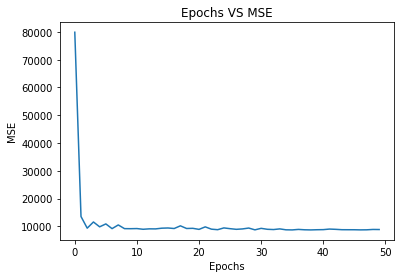

In [145]:
#plot the graph
plt.plot(epochs_graph, mse_graph)
#label plot axes
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Epochs VS MSE")


plt.show()


# Exercise 2

a. Calculate Root Mean Squared Error for the model on the validation set. 

b. Calculate Mean Absolte Error for the model on the validation set.

c. Calculate $R^{2}$ for the model on the validation set.

d. Please discuss the results. Does $R^{2}$ indicate a good fit? How close does the model come to predicting the weight of a fish in grams?

In [146]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [147]:
#get a regressor, load the coefs and make preditions
#from class book page 115
y_pred = X_val.dot(best_model)

In [148]:
#calculate the erros
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("The Mean Squared Error is:\t", mse)
print("The Root Mean Squared Error is:\t", rmse)
print("The Mean Absolute Error is:\t", mae)
print("The R2 Score is:\t\t", r2)

The Mean Squared Error is:	 6533.330264849474
The Root Mean Squared Error is:	 80.82901870522414
The Mean Absolute Error is:	 61.33285530678641
The R2 Score is:		 0.954068032748328


#R2 Discussion



# Exercise 3

Please answer the following in a few sentences.

a. Please discuss the pros and cons of using a closed form solution for this problem.

b. Suppose you use mini-batch gradient descent and the cost function suffers from excessive local optima in addition to the global optima. What hyperparameter(s) would you change to get better convergence?

c. What would be the advantage of using Lasso Regression for this problem?